<a href="https://colab.research.google.com/github/leticiacaldas/Relatorio-2-CNC/blob/main/Relat%C3%B3rio2_Let%C3%ADciaBrand%C3%A3oCaldas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
np.set_printoptions(precision=3)
import sympy as sp
import matplotlib.pyplot as plt

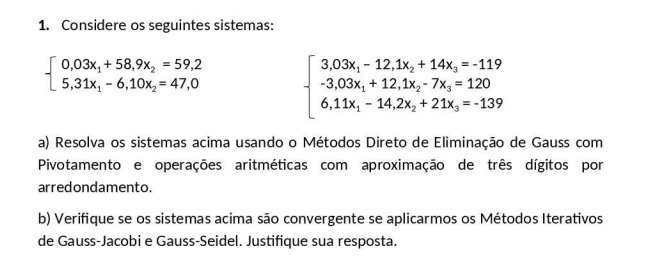

In [ ]:

def m_i(lista):
    maior_numero = lista[0]
    indice_maior_numero = 0

    for i in range(1, len(lista)):
        if lista[i] > maior_numero:
            maior_numero = lista[i]
            indice_maior_numero = i

    return maior_numero, indice_maior_numero

def pivota(A, b):
    # Pivotação Completa
    n = len(b)
    for i0 in range(n):
        l, ind = m_i(A[i0])
        for i in range(i0 + 1, n):
            m = A[i][ind] / A[i0][ind]
            for k in range(n):
                A[i][k] -= m * A[i0][k]
            b[k] -= m * b[i0]

    x = np.linalg.solve(np.array(A), np.array(b))
    return x


In [ ]:
# Como no exercício pede só para verificar se a matriz é aplicável o método de
# Jacobi ou Seidel fiz só para verificar se é aplicável.
def verfi_int(A, b):
    n = len(b)
    if all(abs(A[i][i]) > sum(abs(A[i][j]) for j in range(n) if j != i) for i in range(n)):
        print("A matriz é diagonalmente dominante.")
    else:
        print("A matriz não é diagonalmente dominante.")

    return


A) Sistemas 2x2

In [ ]:
A = [[0.03, 58.9],
     [5.31, -6.10]]
b = [59.2, 47.0]
pivota(A,b)

array([10.,  1.])

Sistemas 3x3

In [ ]:
A = [[3.03,-12.1,14.0],[-3.03,12.1,-7.0],[6.11,-14.4,21.0]]
b = [-119.0,120.0,-139.0]
pivota(A,b)

array([-37.691,  10.396,   8.643])

B) Verificando se o método de Jacobi e Seidel é aplicável

In [ ]:
A = [[0.03, 58.9],
     [5.31, -6.10]]
b = [59.2, 47.0]
verfi_int(A,b)

A matriz não é diagonalmente dominante.


In [ ]:
A = [[3.03,-12.1,14.0],[-3.03,12.1,-7.0],[6.11,-14.4,21.0]]
b = [-119.0,120.0,-139.0]
verfi_int(A,b)

A matriz não é diagonalmente dominante.


Ambas as matrizes não são convergíveis ou têm uma convergência que demoraria infinitos passos. Isso vale tanto para o método de Jacobi quanto para o de Seidel.



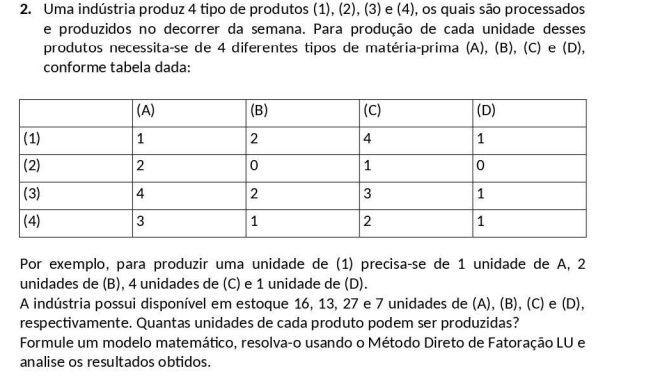

In [ ]:
def LU(A):
    n = len(A[0])
    U = [[0] * n for _ in range(n)]
    L = [[1 if j == k else 0 for j in range(n)] for k in range(n)]

    for i in range(n):
        for j in range(n):
            if i <= j:
                U[i][j] = A[i][j] - sum(L[i][k] * U[k][j] for k in range(i))
            else:
                L[i][j] = (A[i][j] - sum(L[i][k] * U[k][j] for k in range(j))) / U[j][j]

    return L, U

In [ ]:
def forward_substitution(L, b):
    n = len(b)
    y = [0.0] * n

    for i in range(n):
        y[i] = b[i] - sum([L[i][j]*y[j] for j in range(0,i)])
    return y

def backward_substitution(U, y):
    n = len(y)
    x = [0.0] * n

    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - sum(U[i][j] * x[j] for j in range(i + 1, n))) / U[i][i]

    return x


In [ ]:
b = [16,13,27,7]
A = [[1,2,4,3],[2,0,2,1],[4,1,3,2],[1,0,1,1]]
L,U = LU(A)
#Lx = b
y = forward_substitution(L, b)
#Uy = b
x = backward_substitution(U, y)
print("Vetor x:")
print(x)


Vetor x:
[5.0, 2.0, 1.0, 1.0]


Esse valor da matriz é a quantidade de material que devemos usar para produzir cada produto.



---

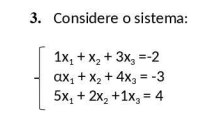


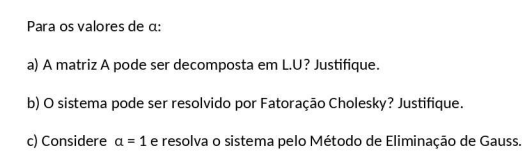

In [ ]:
a = sp.symbols("a")
A = sp.Matrix([[1,1,3],[a,1,4],[5,2,1]])
b = [-2,-3,4]

In [ ]:
# Verifica o determinante de 1x1
sp.Matrix([1]).det()

1

In [ ]:
# Verifica o determinante de 2x2
sp.Matrix([[1,1],[a,1]]).det()

1 - a

In [ ]:
# Verifica o determinante de 3x3
A.det()

5*a - 2

Contanto que a matriz a seja diferente de a = 2/5 e de a = 1 é possível resolver por LU, pois todos os menores principais da matriz não podem ser nulos, ou seja, os determinantes de 1x1, 2x2, 3x3 não podem ser iguais a 0


B) Para aplicar fatoração de Cholesky a matriz tem que ser simitétrica

In [ ]:
# Provar simetria para ver se é aplicável a fatoração de Cholesky
if A == A.transpose():
    print("A matriz é simétrica.")
else:
    print("A matriz não é simétrica.")

A matriz não é simétrica.


Como a matriz não é simétrica, não podemos aplicar o método de Cholesky

C) Método de Eliminação de Gauss:

In [ ]:
def eliminacaoGauss(A, b):
    n = len(b)
    for k in range(n - 1):
        max_index = max(range(k, n), key=lambda i: abs(A[i][k]))

        A[k], A[max_index] = A[max_index], A[k]
        b[k], b[max_index] = b[max_index], b[k]

        for i in range(k + 1, n):
            m = A[i][k] / A[k][k]
            for j in range(k + 1, n):
                A[i][j] -= m * A[k][j]
            b[i] = b[i] - m * b[k]

    x = [0] * n
    x[-1] = b[-1] / A[-1][-1]

    for i in range(n - 2, -1, -1):
        soma = 0
        for j in range(i + 1, n):
            soma += A[i][j] * x[j]
        x[i] = (b[i] - soma) / A[i][i]

    return x

In [ ]:
A = [[1.0,1.0,3.0],[1.0,1.0,4.0],[5.0,2.0,1.0]]
b = [-2.0,-3.0,4.0]
eliminacaoGauss(A,b)

[1.0, 0.0, -1.0]

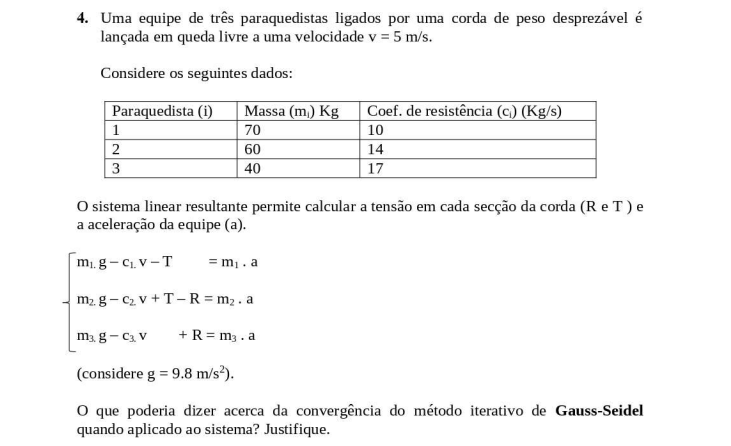

In [ ]:
A = [[-1,0,-70],[1,-1,-60],[0,1,-30]]
b= [-636,-518,-307]

In [ ]:
verfi_int(A,b)

A matriz não é diagonalmente dominante.


In [ ]:
def Seidel(A, b, max_iter=50, erro=1e-6):
    n = len(b)
    x = [1.0] * n
    x1 = [0.0] * n
    k = 0

    while max([abs(x[i] - x1[i]) for i in range(n)]) > erro and k < max_iter:
        k += 1
        x1 = x.copy()

        for i in range(n):
            soma = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x[i] = (b[i] - soma) / A[i][i]

        print(f"Iteração {k}: {x}|{[abs(x[i] - x1[i]) for i in range(n)]}")

    return x

# Exemplo de uso
A = [[-1, 0, -70], [1, -1, -60], [0, 1, -30]]
b = [-636, -518, -307]

solucao = Seidel(A, b)

print("Solução final:", solucao)

Iteração 1: [566.0, 1024.0, 44.36666666666667]|[565.0, 1023.0, 43.36666666666667]
Iteração 2: [-2469.6666666666665, -4613.666666666666, -143.55555555555554]|[3035.6666666666665, 5637.666666666666, 187.92222222222222]
Iteração 3: [10684.888888888889, 19816.22222222222, 670.774074074074]|[13154.555555555555, 24429.888888888883, 814.3296296296295]
Iteração 4: [-46318.185185185175, -86046.6296296296, -2857.987654320987]|[57003.074074074066, 105862.85185185182, 3528.7617283950613]
Iteração 5: [200695.1358024691, 372692.3950617283, 12433.313168724277]|[247013.32098765427, 458739.0246913579, 15291.300823045263]
Iteração 6: [-869695.9218106994, -1615176.711934156, -53828.9903978052]|[1070391.0576131684, 1987869.1069958843, 66262.30356652947]
Iteração 7: [3768665.327846364, 6998922.751714677, 233307.65839048923]|[4638361.249657064, 8614099.463648833, 287136.6487882944]
Iteração 8: [-16330900.087334245, -30328841.5907636, -1010951.1530254533]|[20099565.41518061, 37327764.342478275, 1244258.81141

Conclui que para este sistema de equações específico, o método de Gauss-Seidel não é adequado e não produzirá uma solução útil. Isso pode ser devido à estrutura específica do sistema ou à escolha inadequada de parâmetros para o método iterativo.


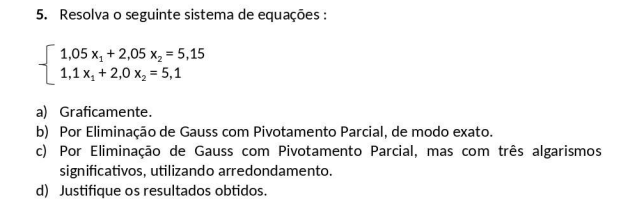

In [ ]:
A = [[1.05,2.05],[1.1,2.0]]
b = [5.15,5.1]

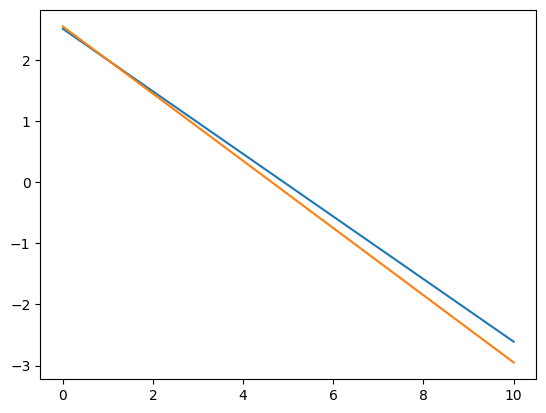

Ponto de interseção (x1*, x2*): {x1: 1.00000000000000, x2: 2.00000000000000}


In [ ]:
# Definindo as equações
f1 = lambda x: (5.15 - 1.05*x)/2.05
f2 = lambda x: (5.1 - 1.1*x)/2.0

x1_values = np.linspace(0, 10, 100)

y1_values = [f1(x) for x in x1_values]
y2_values = [f2(x) for x in x1_values]

plt.plot(x1_values, y1_values)
plt.plot(x1_values, y2_values)
plt.show()


# Encontrar o oponto de interseção
x1, x2 = sp.symbols('x1 x2')

eq1 = sp.Eq(1.05*x1 + 2.05*x2, 5.15)
eq2 = sp.Eq(1.1*x1 + 2.0*x2, 5.1)
solucao = sp.solve((eq1, eq2), (x1, x2))

print("Ponto de interseção (x1*, x2*):", solucao)

B)

In [ ]:
A = [[1.05,2.05],[1.1,2.0]]
b = [5.15,5.1]
np.set_printoptions(precision=0)
pivota(A,b)


array([1., 2.])

C)

In [ ]:
A = [[1.05,2.05],[1.1,2.0]]
b = [5.15,5.1]
x = eliminacaoGauss(A,b)
print("Valores: ",[round(i,3) for i in x])

Valores:  [1.0, 2.0]


D) Com os arredondamentos de 3 casas o valor deu o mesmo para todos tanto em graficamente achando os pontos de interseção quanto por eliminação de Gauss com pivotação parcial ou eliminação de Gauss com pivotação completa. O resultado sempre será exato pela regra de aproximação.




